In [4]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict as ddict
import xarray as xr
import pickle
%matplotlib widget

In [25]:
def load_data(sr = 4096):
    data = {
        'sr' : sr,
        'pressure' : {
            'leak' : ddict(dict),
            'no_leak' : ddict(dict)
        },
        'hydrophone' : {
            'leak' : ddict(dict),
            'no_leak' : ddict(dict)
        }
    }
    
    workspace_path = os.path.join( os.getcwd(), 'data' )
    for dtype in ('pressure', 'hydrophone'):
        for scenario in ('leak', 'no_leak'):
            scenario_folder = os.path.join(workspace_path, dtype, scenario)
            for case in os.listdir(scenario_folder):
                cases_path = os.path.join(scenario_folder, case)
                if case in ('demand_ns', 'demand_s'):
                    if type(data[dtype][scenario][case]) is dict:
                        data[dtype][scenario][case] = ddict(dict)
                    for demand_val in os.listdir(cases_path):
                        dpath = os.path.join(cases_path, demand_val)
                        for i, file in enumerate(sorted(os.listdir(dpath))):
                            fpath = os.path.join(dpath, file)
                            if dtype == 'pressure': # CSV files
                                y = np.loadtxt(fpath, skiprows=4, delimiter=',')
                                old_sr = 1 / (y[1,0]-y[0,0])
                                y = librosa.resample(y[:,1], old_sr, sr)
                                data[dtype][scenario][case][demand_val][i] = y
                                print(dtype, scenario, case, demand_val, i)
                            elif dtype == 'hydrophone': # wav files
                                y, sr = librosa.load(fpath, sr=sr)
                                data[dtype][scenario][case][demand_val][i] = y
                                print(dtype, scenario, case, demand_val, i)
                else:
                    for i, file in enumerate(sorted(os.listdir(cases_path))):
                        fpath = os.path.join(cases_path, file)
                        if dtype == 'pressure': # CSV files
                            y = np.loadtxt(fpath, skiprows=4, delimiter=',')
                            old_sr = 1 / (y[1,0]-y[0,0])
                            y = librosa.resample(y[:,1], old_sr, sr)
                            data[dtype][scenario][case][i] = y
                            print(dtype, scenario, case, i)
                        elif dtype == 'hydrophone': # wav files
                            y, sr = librosa.load(fpath, sr=sr)
                            data[dtype][scenario][case][i] = y
                            print(dtype, scenario, case, i)
    return data

data = load_data(2048)
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

pressure leak transient_ns 0
pressure leak transient_ns 1
pressure leak demand_s F7_5 0
pressure leak demand_s F7_5 1
pressure leak demand_s F3 0
pressure leak demand_s F3 1
pressure leak ndemand_ns 0
pressure leak ndemand_ns 1
pressure no_leak transient_ns 0
pressure no_leak transient_ns 1
pressure no_leak demand_s F7_5 0
pressure no_leak demand_s F7_5 1
pressure no_leak demand_s F3 0
pressure no_leak demand_s F3 1
pressure no_leak ndemand_ns 0
pressure no_leak ndemand_ns 1
hydrophone leak transient_ns 0
hydrophone leak transient_ns 1
hydrophone leak transient_s 0
hydrophone leak transient_s 1
hydrophone leak demand_s F7_5 0
hydrophone leak demand_s F7_5 1
hydrophone leak demand_s F3 0
hydrophone leak demand_s F3 1
hydrophone leak ndemand_s 0
hydrophone leak ndemand_s 1
hydrophone leak ndemand_ns 0
hydrophone leak ndemand_ns 1
hydrophone no_leak transient_ns 0
hydrophone no_leak transient_ns 1
hydrophone no_leak transient_s 0
hydrophone no_leak transient_s 1
hydrophone no_leak demand_

/home/griano/Documents/Github/EE382V/final_project/data/hydrophone/no_leak/ndemand_ns/01-BR_NL_ND_NS_H1.wav
/home/griano/Documents/Github/EE382V/final_project/data/hydrophone/no_leak/ndemand_ns/02-BR_NL_ND_NS_H2.wav
/home/griano/Documents/Github/EE382V/final_project/data/hydrophone/leak/ndemand_ns/02-BR_O_1.6 mm_ND_NS_H2.wav
/home/griano/Documents/Github/EE382V/final_project/data/hydrophone/leak/ndemand_ns/01-BR_O_1.6 mm_ND_NS_H1.wav


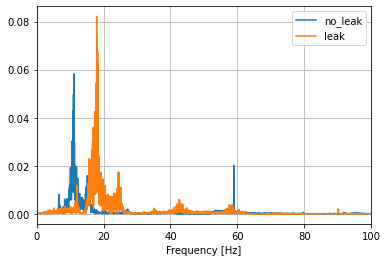

In [34]:
x_noleak = []
ppath = '/home/griano/Documents/Github/EE382V/final_project/data/hydrophone/no_leak/ndemand_ns'
for i in os.listdir(ppath):
    fpath = os.path.join(ppath, i)
    print(fpath)
    y, sr = librosa.load(fpath, sr=4096)
    x_noleak.append(y[:100000])
    
x_leak = []
ppath = '/home/griano/Documents/Github/EE382V/final_project/data/hydrophone/leak/ndemand_ns'
for i in os.listdir(ppath):
    fpath = os.path.join(ppath, i)
    print(fpath)
    y, sr = librosa.load(fpath, sr=4096)
    x_leak.append(y)

from scipy.fft import fft
import matplotlib.pyplot as plt

j = 0

# Number of sample points
N = len(x_noleak[j])
T = 1.0 / 4096
x = np.linspace(0.0, N*T, N)
y = x_noleak[j]
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label='no_leak')
yf = fft(x_leak[j])
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label='leak')
plt.grid()
plt.xlim([0,100])
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.savefig('Spectrum.png')
plt.show()



In [9]:
sr = 1 / (x[1,0]-x[0,0])
xx = librosa.resample(x[:,1], sr, 4096)

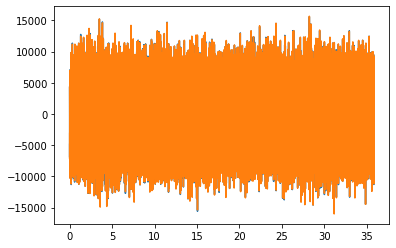

In [10]:
%matplotlib inline
t = np.linspace(0,x[-1,0], len(x))
plt.plot(t,x[:,1])
tt = np.linspace(0,x[-1,0], len(xx))
plt.plot(tt,xx)
plt.show()